In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

1


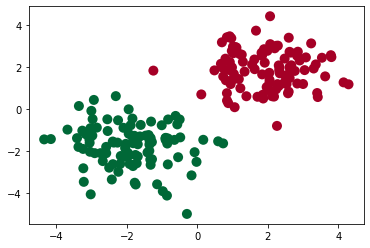

In [18]:
n_data = torch.ones(100,2) #必须是二维的
# print(n_data.dim())
x0 = torch.normal(2*n_data,1)
# print(x0)
y0 = torch.zeros(100) #labels
print(y0.dim())
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100) #labels

x = torch.cat((x0,x1),0).type(torch.FloatTensor)  
y = torch.cat((y0,y1),0).type(torch.LongTensor)   #作为标签的标准格式

# plt.scatter(x0[:,0],x0[:,1])
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()


In [ ]:
#构建模型
net = torch.nn.Sequential(
    torch.nn.Linear(2,20),
    torch.nn.ReLU(),
    torch.nn.Linear(20,2),
    torch.nn.Sigmoid()
)
print(net)

In [ ]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()
plt.show()

for t in range(100):
    out = net(x)
    # print(prediction)
    loss = loss_func(out,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t%2==0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        # print(F.softmax(prediction))
        prediction = torch.max(F.softmax(out),1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()
